In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
img_size = 100
input_shape = (32,img_size,img_size,3)
batch_size = 32
chanels = 3
epochs = 40
num_class = 4

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "RICE",
    shuffle = True,
    image_size = (img_size, img_size),
    batch_size = batch_size,   
)

Found 5932 files belonging to 4 classes.


In [4]:
class_name = dataset.class_names
print(class_name)

['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']


In [5]:
len(dataset)

186

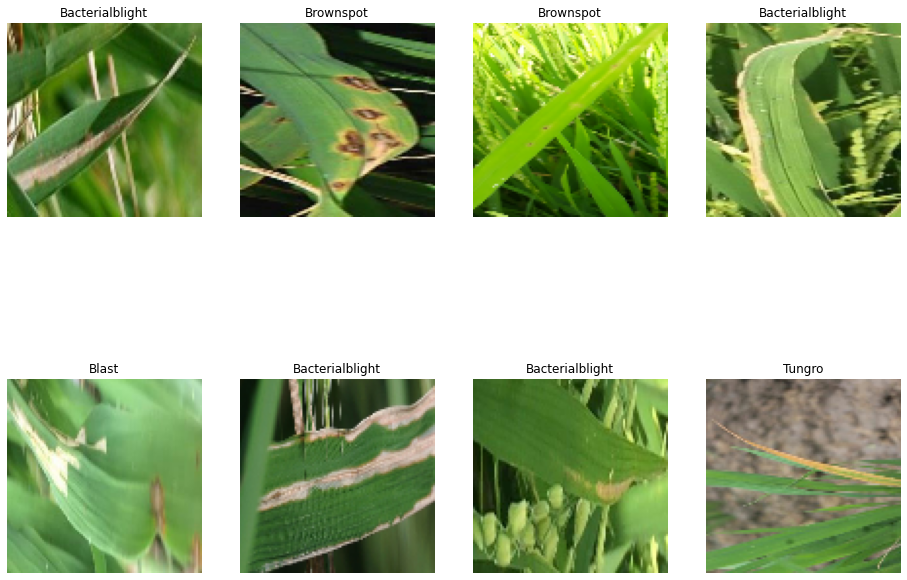

In [6]:
plt.figure(figsize=(16,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(8):
        plt.subplot(2,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [7]:
def split_data(data, train = 0.8 , val = 0.1, test = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(data)
    if shuffle:
        data = data.shuffle(shuffle_size)
    train_sz = int(train*ds_size)
    train_ds = data.take(train_sz)
    tmp = data.skip(train_sz)
    
    val_sz = int(val*ds_size)
    val_ds = tmp.take(val_sz)
    test_ds = tmp.skip(val_sz)
    return train_ds, val_ds, test_ds

In [8]:
 train, val, test = split_data(dataset)

In [9]:
len(train)

148

In [10]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size, img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
input_shape

(32, 100, 100, 3)

In [13]:
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(num_class, activation = "softmax")
])
model.build(input_shape = input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 100, 100, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 100, 100, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 98, 98, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 49, 49, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 47, 47, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 23, 23, 64)         0         
 2D)                                                  

In [15]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [16]:
history = model.fit(
    train,
    epochs = epochs,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val
)

Epoch 1/40
148/148 [==============================] - 44s 271ms/step - loss: 1.0598 - accuracy: 0.5204 - val_loss: 0.8691 - val_accuracy: 0.5972
Epoch 2/40
148/148 [==============================] - 44s 279ms/step - loss: 0.7234 - accuracy: 0.7144 - val_loss: 0.5327 - val_accuracy: 0.7812
Epoch 3/40
148/148 [==============================] - 44s 278ms/step - loss: 0.5351 - accuracy: 0.7928 - val_loss: 0.4565 - val_accuracy: 0.8264
Epoch 4/40
148/148 [==============================] - 45s 283ms/step - loss: 0.3805 - accuracy: 0.8592 - val_loss: 0.3762 - val_accuracy: 0.8715
Epoch 5/40
148/148 [==============================] - 45s 283ms/step - loss: 0.3051 - accuracy: 0.8846 - val_loss: 0.2360 - val_accuracy: 0.9132
Epoch 6/40
148/148 [==============================] - 45s 286ms/step - loss: 0.2221 - accuracy: 0.9201 - val_loss: 0.3416 - val_accuracy: 0.8733
Epoch 7/40
148/148 [==============================] - 45s 285ms/step - loss: 0.1898 - accuracy: 0.9313 - val_loss: 0.3410 - val_ac

In [17]:
scores = model.evaluate(test)

20/20 [==============================] - 4s 62ms/step - loss: 0.0035 - accuracy: 1.0000


In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

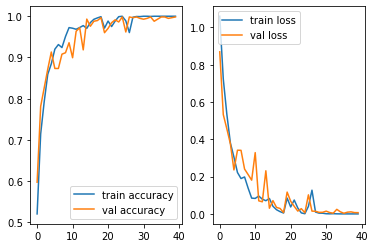

In [21]:
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'train accuracy')
plt.plot(range(epochs), val_acc, label = 'val accuracy')
plt.legend(loc = 'lower right')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'train loss')
plt.plot(range(epochs), val_loss, label = 'val loss')
plt.legend(loc = 'upper left')

first image to predict
actual label :  Bacterialblight
1/1 [==============================] - 1s 1s/step
predicted label :  Bacterialblight


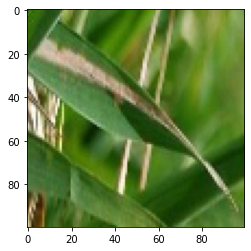

In [22]:
for images_batch , labels_batch in test.take(1):
    first_img = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_img)
    print("actual label : ", class_name[first_label.numpy()])
    
    batch_pred = model.predict(images_batch)
    print("predicted label : ",class_name[np.argmax(batch_pred[0])])

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    
    predd = model.predict(img_array)
    predd_class = class_name[np.argmax(predd[0])]
    confidence = round(100 * (np.max(predd[0])), 2)
    return predd_class, confidence

1/1 [==============================] - 0s 22ms/step


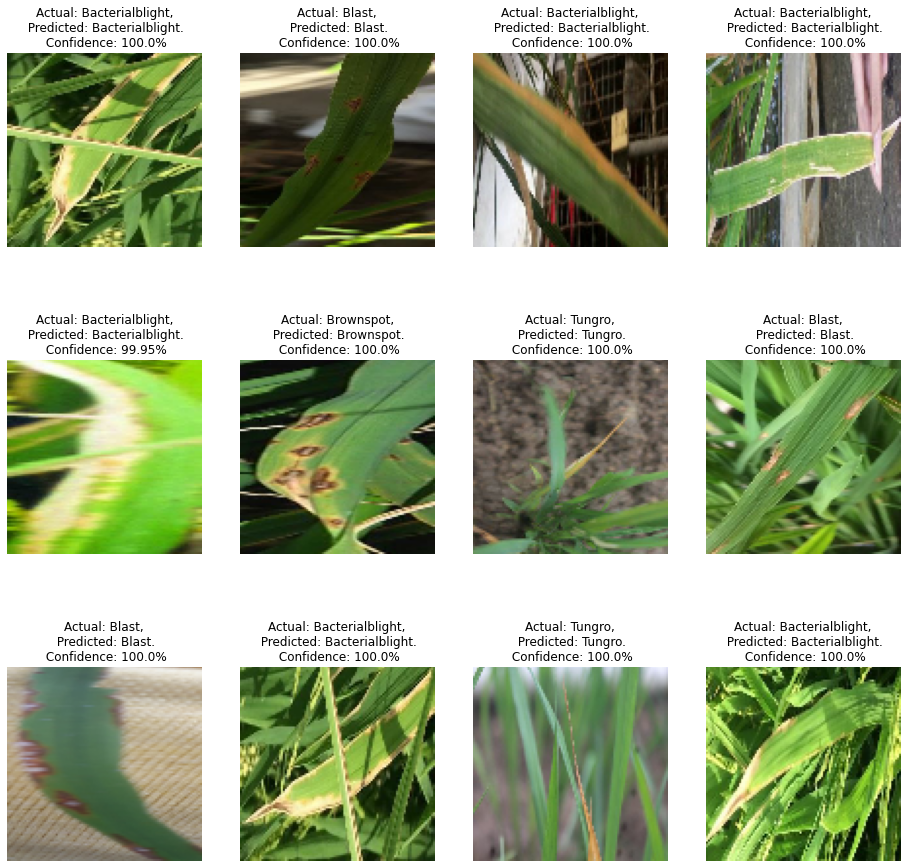

In [24]:
plt.figure(figsize = (16,16))
for imgs, labels in test.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(imgs[i].numpy().astype("uint8"))
        plt.axis("off")
        predd_class, confidence = predict(model, imgs[i].numpy())
        main_class = class_name[labels[i]]
        plt.title(f"Actual: {main_class},\n Predicted: {predd_class}.\n Confidence: {confidence}%")


In [25]:
model_version = 1.0
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/1.0\assets


INFO:tensorflow:Assets written to: ../model/1.0\assets


In [26]:
model.save("../rice_model.h5")